In [ ]:
!pip install sastrawi
!pip install transformers
!pip install seaborn
!pip install wordcloud
!pip install scikit-learn
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd

with open("/content/drive/MyDrive/TanyaRasa/intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,salam,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,salam,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,salam,Hola,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,salam,Helo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,salam,hallo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
...,...,...,...
1911,mental health tanya 11,bagaimana cara menjaga kesehatan mental saat i...,[Menjaga kesehatan di tengah cobaan hidup adal...
1912,mental health tanya 12,bagaimana cara mengatur pikiran agar mental te...,[Relaksasi sangat penting dalam mengelola kese...
1913,mental health tanya 13,Gimana orang awam yang bukan psikolog atau exp...,"[Ketika seseorang merasa insecure, ada potensi..."
1914,mental health tanya 14,bagaimana cara agar mental kita kuat ?,[Kekuatan mental yang kuat merupakan kunci dal...


In [ ]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

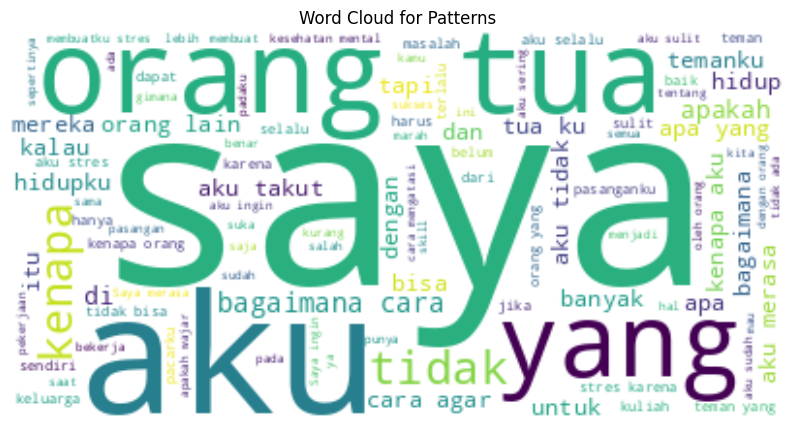

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

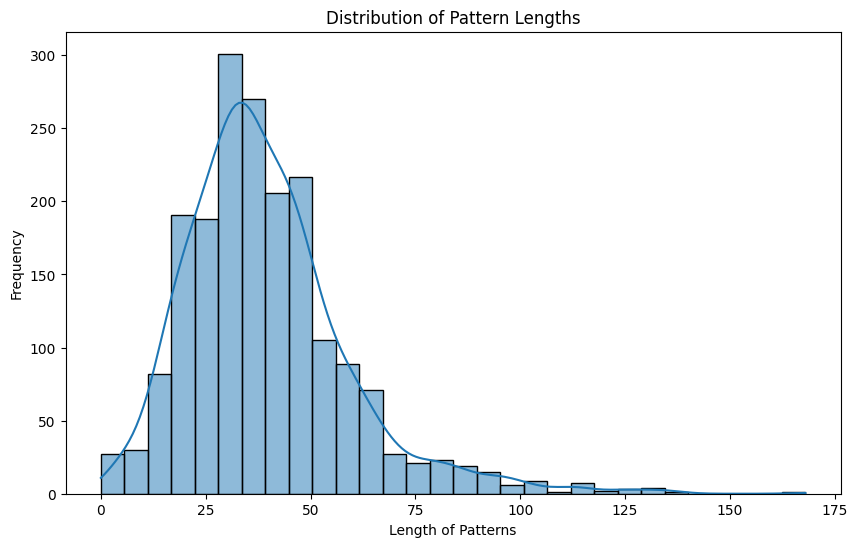

In [ ]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

In [ ]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

In [ ]:
df['tag'].unique()

array(['salam', 'tanya keberadaan', 'pagi', 'siang', 'malam',
       'selamat tinggal', 'terima kasih', 'tidak ada tanggapan',
       'respons netral', 'tentang', 'keterampilan', 'penciptaan', 'nama',
       'bantuan', 'sedih', 'stres', 'tidak berharga', 'depresi', 'baik',
       'balasan baik', 'akhir', 'santai', 'cemas', 'tidak berbicara',
       'tidur', 'takut', 'kematian', 'mengerti', 'selesai', 'bunuh diri',
       'benci-kamu', 'benci-aku', 'bawaan', 'lelucon', 'tanya lagi',
       'bertanya ', 'ulangi', 'salah', 'bodoh', 'lokasi',
       'sesuatu yang lain', 'ujian', 'tidak ada pendekatan',
       'pelajari lebih lanjut', 'setuju pengguna', 'meditasi',
       'meditasi pengguna', 'berguna', 'saran pengguna',
       'belajar-kesehatan mental', 'fakta-kesehatan mental', 'fakta-1',
       'fakta-2', 'fakta-3', 'fakta-5', 'fakta-6', 'fakta-7', 'fakta-8',
       'fakta-9', 'fakta-10', 'fakta-11', 'fakta-12', 'fakta-13',
       'fakta-14', 'fakta-15', 'fakta-16', 'fakta-17', 'fakta-1

In [ ]:
len(df['tag'].unique())

577

# PRE PROCESSING INDO

In [ ]:
import numpy as np
import pandas as pd
import nltk
import random
import json
import re
import string
import itertools

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# 2. Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. Load your intents.json
with open("/content/drive/MyDrive/TanyaRasa/intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 4. Flatten data
rows = []
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent["patterns"]
    responses = intent["responses"]

    for pattern in patterns:
        for response in responses:
            rows.append({
                "intent": tag,
                "pattern": pattern,
                "response": response
            })

df = pd.DataFrame(rows)

# 5. Text preprocessing function
def preprocess_text(text):
    text = text.lower()                            # lowercase
    text = re.sub(r"[^\w\s]", " ", text)           # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    text = ' '.join(words)
    stemmed = stemmer.stem(text)                   # stemming
    return stemmed.strip()

# 6. Apply preprocessing
df["pattern_clean"] = df["pattern"].apply(preprocess_text)
df["response_clean"] = df["response"].apply(preprocess_text)

# 7. Show result
print(df[["intent", "pattern", "pattern_clean", "response_clean"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  intent pattern pattern_clean            response_clean
0  salam     Hai           hai           halo cerita asa
1  salam     Hai           hai                 halo bawa
2  salam     Hai           hai                  halo asa
3  salam     Hai           hai  senang temu dengan kabar
4  salam     Hai           hai                 halo rasa


In [ ]:
X = df['pattern_clean']
y = df['intent']

# Build Model

In [ ]:

from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
from transformers import AutoConfig

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

MODEL_ID = "/content/drive/MyDrive/TanyaRasa/best_model_indobert"  # hasil indobert 12 epoch
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)

config = AutoConfig.from_pretrained(
    MODEL_ID,
    num_labels=num_labels,
    hidden_dropout_prob=0.0,
    attention_probs_dropout_prob=0.0,
    classifier_dropout=0.0,  # optional
)


model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_ID,
    config=config
)
MAX_LEN = 128

def encode_texts(texts, max_len=MAX_LEN):
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

In [ ]:
from torch.utils.data import TensorDataset, random_split, DataLoader
import numpy as np


input_ids, attention_masks = encode_texts(X)
labels = torch.tensor(y_encoded, dtype=torch.long)

dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32)
validation_dataloader = DataLoader(val_dataset, batch_size=32)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW

save_directory = "/content/drive/MyDrive/TanyaRasa/indobert_finetuned_32_3e"

optimizer = AdamW(model.parameters(), lr=3e-5)

epochs = 9
patience = 3
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
        model.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_dataloader)

    # Validation loss
    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in validation_dataloader:
            b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )
            val_loss += outputs.loss.item()
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(b_labels.cpu().numpy())
    avg_val_loss = val_loss / len(validation_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        # Optionally save best model
        # torch.save(model.state_dict(), "best_model.pt")
        model.save_pretrained(save_directory)  # Simpan config + weights
        tokenizer.save_pretrained(save_directory)  # Simpan tokenizer
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

Epoch 1, Train Loss: 1.1148, Val Loss: 1.0298
Epoch 2, Train Loss: 0.9584, Val Loss: 0.9983
Epoch 3, Train Loss: 0.8313, Val Loss: 0.9476
Epoch 4, Train Loss: 0.7362, Val Loss: 0.9309
Epoch 5, Train Loss: 0.6937, Val Loss: 0.9111
Epoch 6, Train Loss: 0.6522, Val Loss: 0.8967
Epoch 7, Train Loss: 0.6085, Val Loss: 0.8802
Epoch 8, Train Loss: 0.5719, Val Loss: 0.8738
Epoch 9, Train Loss: 0.5359, Val Loss: 0.8580


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

all_preds = []
all_labels = []
val_loss = 0

with torch.no_grad():
    for batch in validation_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        val_loss += outputs.loss.item()
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(b_labels.cpu().numpy())

# Akurasi
acc = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {acc:.4f}")

# Macro & Weighted F1, Precision, Recall (tanpa per intent)
print(f"F1 Score (weighted): {f1_score(all_labels, all_preds, average='weighted'):.4f}")
print(f"Precision (weighted): {precision_score(all_labels, all_preds, average='weighted', zero_division=0):.4f}")
print(f"Recall (weighted): {recall_score(all_labels, all_preds, average='weighted'):.4f}")

# Confusion matrix (opsional)
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Perplexity
avg_val_loss = val_loss / len(validation_dataloader)
perplexity = np.exp(avg_val_loss)
print(f"Validation Perplexity: {perplexity:.4f}")


Validation Accuracy: 0.8388
F1 Score (weighted): 0.8255
Precision (weighted): 0.8482
Recall (weighted): 0.8388
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
Validation Perplexity: 2.3584


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import torch

def predict_intent(text, threshold=0.1):  # Bisa atur threshold sesuai eksperimen
    model.eval()
    cleaned = preprocess_text(text)
    input_id, attn_mask = encode_texts([cleaned])
    input_id = input_id.to(device)
    attn_mask = attn_mask.to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_id, attention_mask=attn_mask)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)
        confidence, pred_class = torch.max(probs, dim=1)
        confidence = confidence.item()
        pred_class = pred_class.item()

    if confidence < threshold:
        return None, "Maaf, saya tidak memahami maksud Anda. Bisa dijelaskan lagi?"
    else:
        intent = label_encoder.inverse_transform([pred_class])[0]
        responses = df[df['intent'] == intent]['response'].values
        return intent, np.random.choice(responses)


print("TanyaRasa Chatbot (type 'quit' to exit')")
while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Sampai jumpa!")
        break
    intent, response = predict_intent(user_input)
    if intent is None:
        print(f"Chatbot: {response}")
    else:
        print(f"User ({intent}): {user_input}")
        print(f"Chatbot ({intent}): {response}")


TanyaRasa Chatbot (type 'quit' to exit')
You: hai
User (salam): hai
Chatbot (salam): Halo. Ceritakan bagaimana perasaanmu hari ini?
You: aku sedang sedih
User (sedih): aku sedang sedih
Chatbot (sedih): Saya di sini untuk kamu. Bisakah kamu memberitahuku kenapa kamu merasa seperti ini?
You: tugasku banyak
User (tangunggan tugas): tugasku banyak
Chatbot (tangunggan tugas): cobalah membuat daftar semua tanggungan tugas yang kamu miliki. Kemudian, prioritaskan tugas-tugas tersebut berdasarkan urgensi dan pentingnya. ini akan lebih membantumu untuk fokus pada tugas yang paling mendesak dan meringankan beban secara bertahap, nah kamu bisa juga minta tolong oralng lain buat bantu kamu menyelsaikan tugas...
You: aku tidak bisa tidur
User (tidur): aku tidak bisa tidur
Chatbot (tidur): Kelihatannya mengerikan. Menurutmu kenapa ?
You: aku mau travelling
Chatbot: Maaf, saya tidak memahami maksud Anda. Bisa dijelaskan lagi?
You: quit
Chatbot: Sampai jumpa!


In [ ]:
!nvidia-smi

Mon Jun 30 03:43:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             30W /   70W |    4144MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----